<font color='green'> [Practical K-Means Clustering in Python](https://realpython.com/practical-k-means-clustering-python/) makalesindeki ilk kısımda anlatılan notebook. </font>

Teorik tarafı için notlar [notiona](https://www.notion.so/K-Means-Clustering-in-Python-A-Practical-Guide-Real-Python-b3e04d82cd4c44febd78cd18fe5b9149?pvs=4) eklendi.  

## İçindekiler

- make_blobs() ile Sentetik Veri Üretme

- Veriyi Scale Etme (Feature Scaling)

- K-Means Algoritmasını Çalıştırma

- Doğru Küme Sayısını Seçme Metodları
    - Elbow Method
    - Silhouette Coefficient


- Elimizde Ground Truth Labellar Olduğu Durumda Algoritmanın Performansını Değerlendirme Yöntemi

# K-Means Clustering in Python -- Synthetic Data

This jupyter notebook accompanies the Real Python's [Practical K-Means Clustering in Python](https://realpython.com/practical-k-means-clustering-python/) article. Specifically, this notebook works through the **first half** of the article, when working with synthetic data.

## K-Means Clustering in Python

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## <font color='blue'> make_blobs() ile Sentetik Veri Üretme</font>

**n_samples:** üreteceğimiz sampleların sayısı

**centers:** üreteceğimiz merkezlerin sayısı

**cluster_std:** standart sapma

make_blobs(), iki değerden oluşan bir tuple döndürür:

1. Sampleların her biri için **x- ve y-değerlerine** sahip iki boyutlu bir NumPy array
2. Her sample için **küme labellarını** içeren tek boyutlu bir NumPy array

Tutorialı takip edebilmek için random_state'e integer bir değer atadık.

In [3]:
features, true_labels = make_blobs(
    n_samples=200, centers=3, cluster_std=2.75, random_state=42
)

In [4]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [5]:
true_labels[:5]

array([1, 0, 2, 2, 2])

## <font color='blue'> Veriyi Scale Etme (Feature Scaling)</font>

Datasetler genellikle boy (inç) ve ağırlık (pound) gibi farklı birimlerde ölçülen sayısal özellikleri içerir. Makine öğrenimi algoritması, yalnızca ağırlık değerlerinin daha büyük olması ve kişiden kişiye daha yüksek değişkenliğe sahip olması nedeniyle ağırlığı boydan daha önemli kabul edebilir. Bunu önlemek için veriyi scale ediyoruz. 

Standardizasyon, veri kümenizdeki her bir sayısal özelliğin değerlerini, özelliklerin ortalaması 0 ve standart sapması 1 olacak şekilde ölçeklendirir veya kaydırır.

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

## <font color='blue'> K-Means Algoritmasını Çalıştırma</font>

Scikit-learndeki KMeans estimator classında parametreleri tune edebiliyoruz.

- **`init`** initialization tekniğini kontrol eder. *k*-means algoritmasının standart versiyonu, "init" ayarını "random" olarak ayarlayarak uygulanır. Bunu `"k-means++"` olarak ayarlamak, yakınsamayı hızlandırır.
    
    *Kümelerin merkezlerini random olarak seçiyor random yazdığımızda.*

- **`n_clusters`**, kümeleme adımı için *k* değerini ayarlar. Bu, *k*-means için en önemli parametredir.

- **`n_init`** gerçekleştirilecek initialization sayısını ayarlar. Bu önemlidir, çünkü iki çalıştırma farklı küme atamalarında birleşebilir. Scikit-learn algoritması için varsayılan davranış, 10 *k*-means çalıştırması gerçekleştirmek ve en düşük SSE'ye sahip olanın sonuçlarını döndürmektir.

- **`max_iter`**, *k*-means algoritmasının her initializationı için maksimum iterasyon sayısını ayarlar.

    *Yani 1. initilizationda kümelerin merkezleri burası olacak dedim, sse'yi en azaltacak şekilde bu merkezleri kaydırdı bunun içinde birçok iterasyon yaptı, en son bir yerde durdu. En fazla kaç defa iterasyon yapsın 300 dedim burada.*

In [15]:
kmeans = KMeans(
    init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42
)

Artık k-means sınıfı hazır olduğuna göre, bir sonraki adım onu scaled_features içindeki verilere fit etmektir. Bu, her run için maksimum 300 iterasyon ile verileriniz üzerinde k-means algoritmasının 10 kez run edilmesini gerçekleştirir.

In [16]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

**İterasyonlar sonucunda en düşük hata oranı neymiş görmek istersek:**

In [17]:
# The lowest SSE (Sum of the squared error) value
kmeans.inertia_

74.57960106819854

**Merkezlerin lokasyonlarını görmek istersek:**

In [18]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

**Noktaların yakınsaması için bir run için maksimum iterasyon sayısını 300 olarak belirlemiştik, ama ne kadar gerekmiş diye bakmak istersek:**

In [19]:
# The number of iterations required to converge
kmeans.n_iter_  # toplam mı, maksimum mu bunu anlamadım?

2

**Labellar ne olmuş diye bakmak istersek:**

In [20]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

In [21]:
true_labels[:5]

array([1, 0, 2, 2, 2])

İlk iki veri nesnesi için küme etiketlerinin sırasının ters çevrildiğini unutmayın. Bu veri nesneleri hala "kmeans.lables_" içindeki orijinal kümelerinin üyeleri olmasına rağmen, "true_labels" içinde "[1, 0]", "kmeans.labels_" içinde "[0, 1]" şeklindeydi.

Küme etiketlerinin sıralaması başlatmaya bağlı olduğundan, bu davranış normaldir. İlk çalıştırmadaki Küme 0, ikinci çalıştırmada küme 1 olarak etiketlenebilir ve bunun tersi de geçerlidir. Bu, kümeleme değerlendirme metriklerini etkilemez.

## <font color='blue'> Doğru Küme Sayısını Seçme Metodları</font>

Bu bölümde, uygun küme sayısını değerlendirmek için yaygın olarak kullanılan iki yönteme bakacağız:

1. The **elbow method**
2. The **silhouette coefficient**

Bunlar genellikle biri diğerine tercih edilmesinden ziyade tamamlayıcı değerlendirme teknikleri olarak kullanılır. 

### <font color='green'> **1. Elbow Method**</font>

**Elbow metodu** gerçekleştirmek için birkaç *k-means* çalıştırıyoruz, her iterasyonda `k` değerini artırıyoruz ve SSE'yi kaydediyoruz:

In [22]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [23]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11): # her belirlediğimiz küme sayısına göre hata sonucunu buluyoruz. 
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_) # kmeans.inertia sum suared of error sonucunu veriyor. 

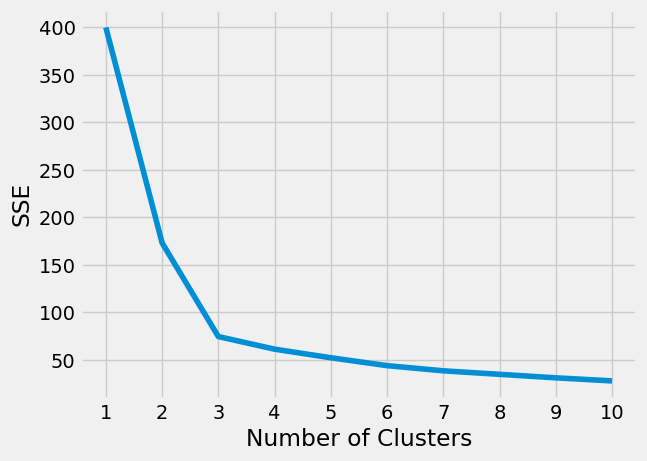

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)  # range 1,11 yazsak da aşağıdaki sayılar tek tek artarak gitmeyebilir.
plt.xticks(range(1, 11)) # x ekseninde 1'den 10'a kadar tek tek yazılmasını sağlıyor.
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

SSE'yi küme sayısının bir fonksiyonu olarak çizdiğinizde, SSE'nin siz 'k'yi artırdıkça azalmaya devam ettiğine dikkat edin. Daha fazla ağırlık merkezi eklendikçe, her noktadan **en yakın merkez noktasına** olan mesafe azalacaktır.

SSE eğrisinin bükülmeye başladığı, **elbow point (dirsek noktası)** olarak bilinen bir nokta vardır. Bu noktanın x değerinin, hata ve küme sayısı arasında makul bir değiş tokuş olduğu düşünülmektedir. Bu örnekte, dirsek "x=3" konumundadır.

Elbow pointi grafik üzerinde belirlemek her zaman kolay değildir. Bunu programatik olarak belirlemek istersek pythonın `kneed` paketini kullanabiliriz.

In [25]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [26]:
kl.elbow

3

### <font color='green'> **2. Silhouette Coefficient**</font>

**Silhouette Coefficient**, küme uyumu (cohesion) ve ayrışmasının (separation) bir ölçüsüdür. Bir veri noktasının atanan kümeye ne kadar iyi uyduğunu iki faktöre dayalı olarak ölçer:

1. Veri noktasının kümedeki diğer noktalara ne kadar yakın olduğu
2. Veri noktasının diğer kümelerdeki noktalardan ne kadar uzakta olduğu

Silhouette Coefficient değerleri "-1" ile "1" arasında değişir. Daha büyük sayılar, örneklerin kendi kümelerine diğer kümelere olduğundan daha yakın olduğunu gösterir.

Scikit-learn'de [siluet katsayısının uygulanmasında](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), tüm örneklerin ortalama siluet katsayısı tek bir değerde özetlenir. `silhouette score()` fonksiyonu en az iki kümeye ihtiyaç duyar, aksi takdirde bir exception döndürür.

`k` değerleri arasında tekrar döngü yapıyoruz. Bu sefer, SSE'yi hesaplamak yerine siluet katsayısını hesaplıyoruz:

In [27]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # aynı parametreleri kullanıyoruz.
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

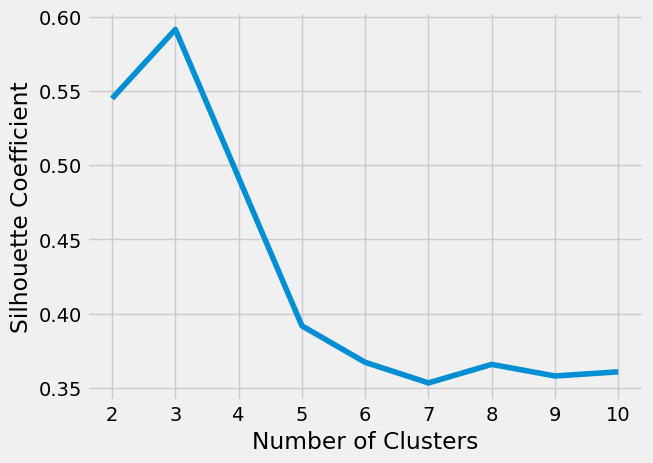

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [29]:
import pandas as pd
data = list(zip([e for e in range(2,11)],silhouette_coefficients))
df_silhouette = pd.DataFrame(data, columns = ['k','silhouette_coefficient']).sort_values(by=['silhouette_coefficient'], ascending=False).reset_index(drop=True)
df_silhouette

,k,silhouette_coefficient
0,3,0.591504
1,2,0.544973
2,4,0.491611
3,5,0.391728
4,6,0.367137
5,8,0.365744
6,10,0.360727
7,9,0.357927
8,7,0.353261


In [30]:
df_silhouette.loc[0]['k']

3.0

Sonuç olarak, kullanılacak küme sayısına ilişkin kararınız, alan bilgisi ve kümeleme değerlendirme ölçümlerinin bir kombinasyonu tarafından yönlendirilmelidir.

## <font color='blue'> Elimizde Ground Truth Labellar Olduğu Durumda Algoritmanın Performansını Değerlendirme Yöntemi</font>

Nonspherical (küresel olmayan) kümelerde yoğunluğa dayalı bir yaklaşımla *k*-means karşılaştırıldığında, elbow methodundan ve silhouette coefficientten elde edilen sonuçlar nadiren insan sezgisiyle eşleşir. Bu senaryo, gelişmiş kümeleme değerlendirme tekniklerinin (advanced clustering evaluation techniques) neden gerekli olduğunu vurgulamaktadır. Bir örneği görselleştirmek istersek:

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

**Bu sefer make_moons()'u hilal şeklinde data generate etmek için kullanıyoruz.**

In [32]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [33]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)

**İki algoritmanın her biri için siluet katsayısını yazdırıp karşılaştırıyoruz.**

In [34]:
kmeans_silhouette

0.5

In [35]:
dbscan_silhouette

0.38

Silhouette Coefficient, k-means algoritması için daha yüksek çıktı. DBSCAN algoritması, verilerin şekline göre daha doğal kümeler buluyor gibi görünüyor.

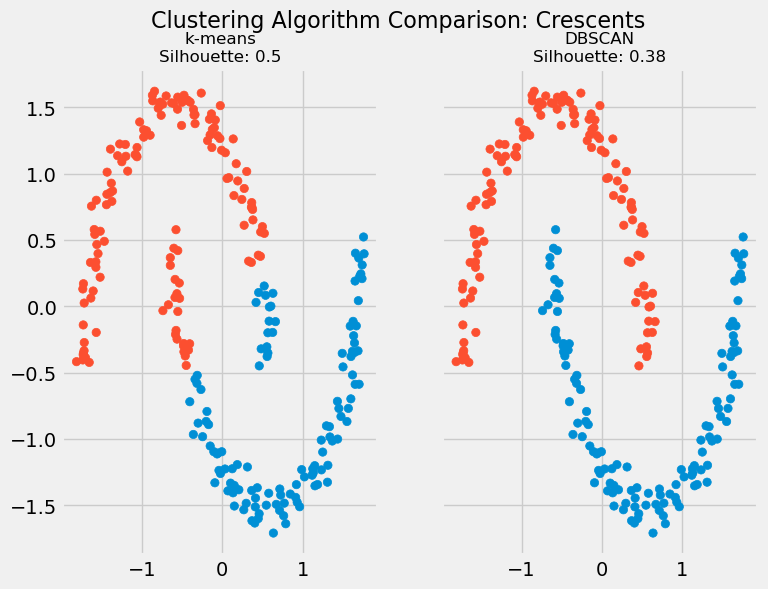

In [36]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

Bu, bu iki kümeleme algoritmasının performansını karşılaştırmak için daha iyi bir yönteme ihtiyacınız olduğunu gösterir.

ground truth labellar bilindiğinden, değerlendirmesinde etiketleri dikkate alan bir kümeleme metriği kullanmak mümkündür. **adjusted rand index (ARI)** adlı bir metriğin [scikit-learn uygulamasını](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score) kullanabilirsiniz. Silhouette Coefficient farklı olarak ARI, gerçek ve tahmin edilen etiketler arasındaki benzerliği ölçmek için gerçek küme atamalarını (true cluster assignments) kullanır.

DBSCAN ve k-meansin kümeleme sonuçlarını karşılaştırıyoruz ve performans ölçüsü olarak ARI kullanıyoruz:

In [37]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [38]:
round(ari_kmeans, 2)

0.47

In [39]:
round(ari_dbscan, 2)

1.0

ARI'nın output değerleri "-1" ile "1" arasında değişir. "0,0"a yakın bir puan rastgele atamaları, "1"e yakın bir puan ise mükemmel şekilde etiketlenmiş kümeleri gösterir.

Yukarıdaki çıktıya dayanarak, Silhouette Coefficientin (siluet katsayısının) yanıltıcı olduğunu görebilirsiniz. ARI, *k*-means ile karşılaştırıldığında DBSCAN'in sentetik hilal örneği için en iyi seçim olduğunu gösteriyor.

Kümeleme algoritmalarının kalitesini değerlendiren birkaç ölçüm vardır. [scikit-learn'deki uygulamaları](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) baştan sona okumak, uygun bir kümeleme değerlendirme metriği seçmenize yardımcı olacaktır.